In [1]:
!kaggle datasets download -d avikasliwal/used-cars-price-prediction

Dataset URL: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction
License(s): other
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 21.6MB/s]


In [2]:
from google.colab import files
import zipfile
import os

filename = r'/content/used-cars-price-prediction.zip'

extract_dir = r'/content/project2'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content/project2


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r'/content/project2/train-data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df=df.drop(columns=['Unnamed: 0','New_Price'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
df['Mileage(km/kg)'] = df['Mileage'].str.split().str[0]

df['Engine(CC)'] = df['Engine'].str.split().str[0]

df['Power(bhp)'] = df['Power'].str.split().str[0]

In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.2,1968,140.8


In [13]:
df.duplicated().sum()

0

In [14]:
df=df.drop_duplicates()
df.duplicated().sum()


0

In [15]:
# Removing the columns
df = df.drop(columns=['Mileage', 'Engine', 'Power'])

# Display the dataframe to check the changes
print(df)

                                  Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Seats  Pric

In [16]:
df.dropna(inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Seats              5975 non-null   float64
 8   Price              5975 non-null   float64
 9   Mileage(km/kg)     5975 non-null   object 
 10  Engine(CC)         5975 non-null   object 
 11  Power(bhp)         5975 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [18]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2,1968,140.8


In [19]:
# Extract the first word from the 'Name' column
df['Name'] = df['Name'].str.split().str[0]

# Display the dataframe to check the changes
print(df)

           Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0        Maruti      Mumbai  2010              72000       CNG       Manual   
1       Hyundai        Pune  2015              41000    Diesel       Manual   
2         Honda     Chennai  2011              46000    Petrol       Manual   
3        Maruti     Chennai  2012              87000    Diesel       Manual   
4          Audi  Coimbatore  2013              40670    Diesel    Automatic   
...         ...         ...   ...                ...       ...          ...   
6014     Maruti       Delhi  2014              27365    Diesel       Manual   
6015    Hyundai      Jaipur  2015             100000    Diesel       Manual   
6016   Mahindra      Jaipur  2012              55000    Diesel       Manual   
6017     Maruti     Kolkata  2013              46000    Petrol       Manual   
6018  Chevrolet   Hyderabad  2011              47000    Diesel       Manual   

     Owner_Type  Seats  Price Mileage(km/kg) Engine

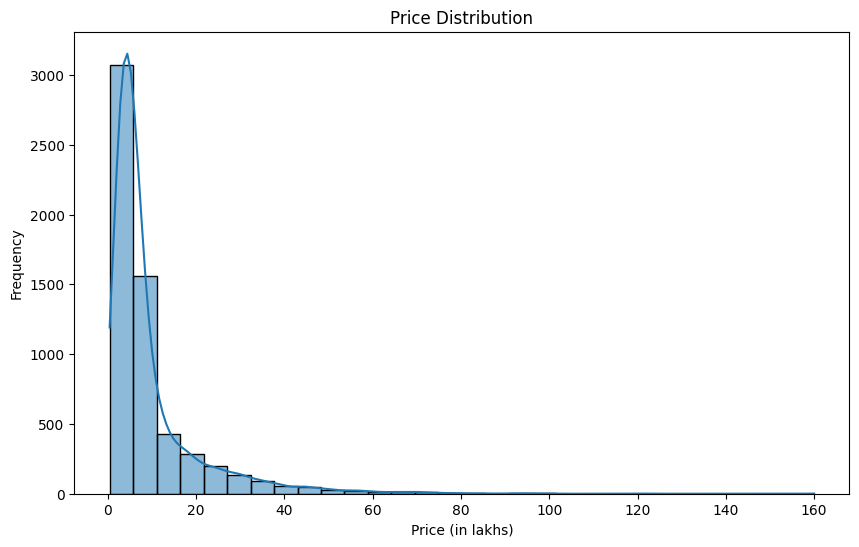

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

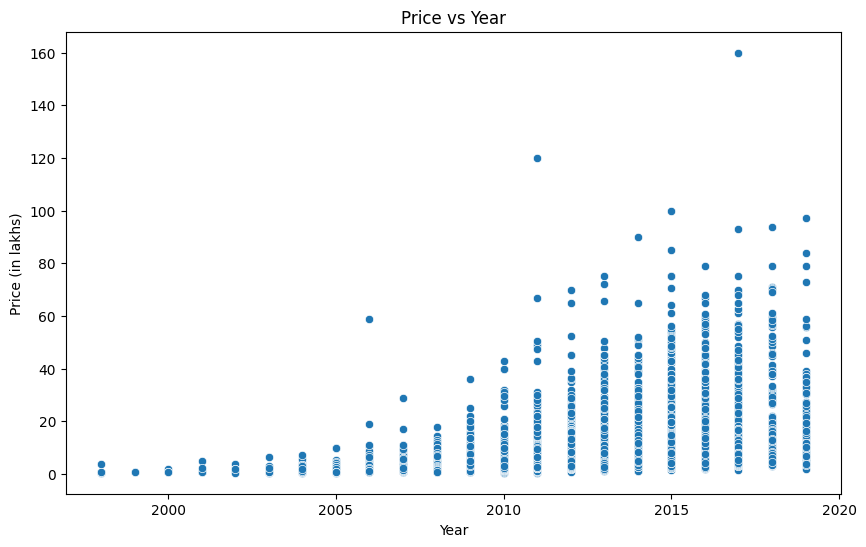

In [21]:
# 2. Price vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price (in lakhs)')
plt.show()


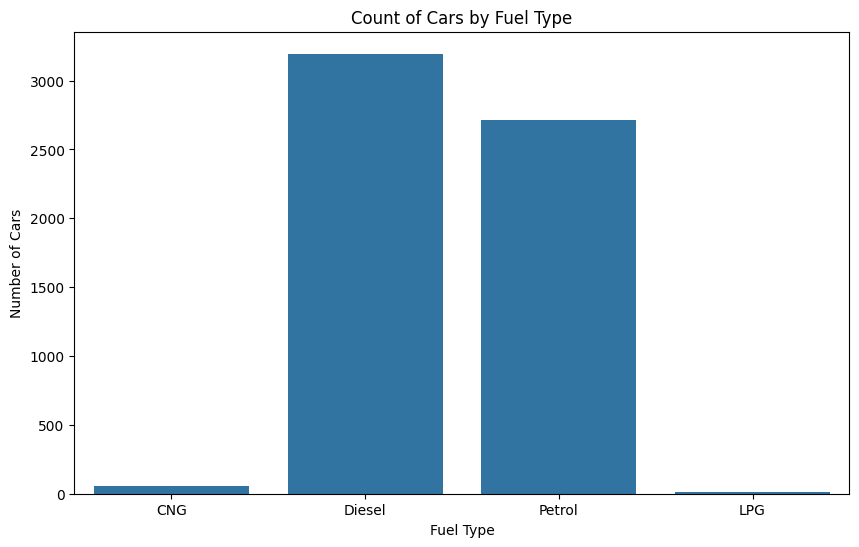

In [22]:
# 3. Count of Cars by Fuel Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

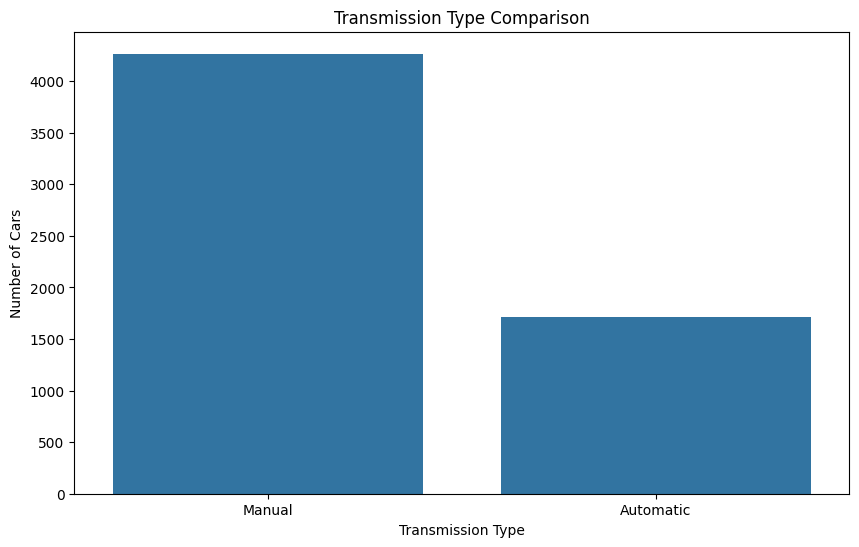

In [23]:
# 4. Transmission Type Comparison
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Type Comparison')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()

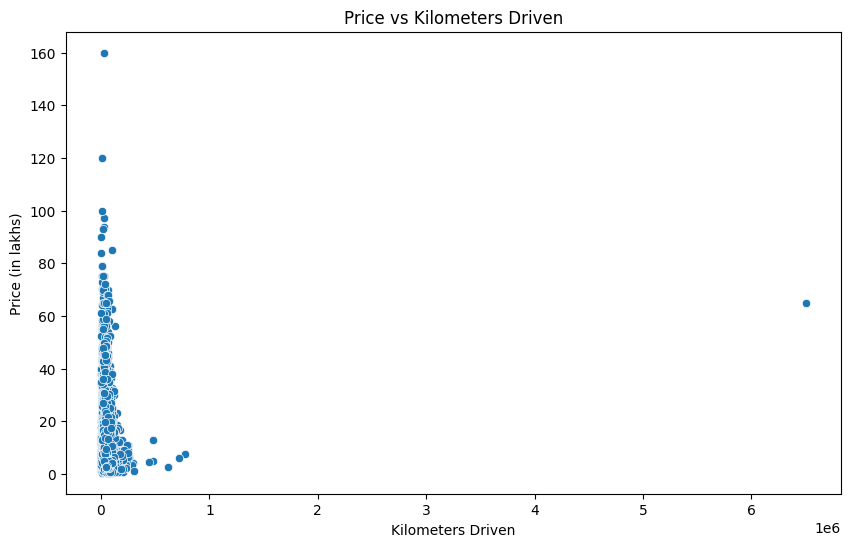

In [24]:
# 5. Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Kilometers_Driven'], y=df['Price'])
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in lakhs)')
plt.show()

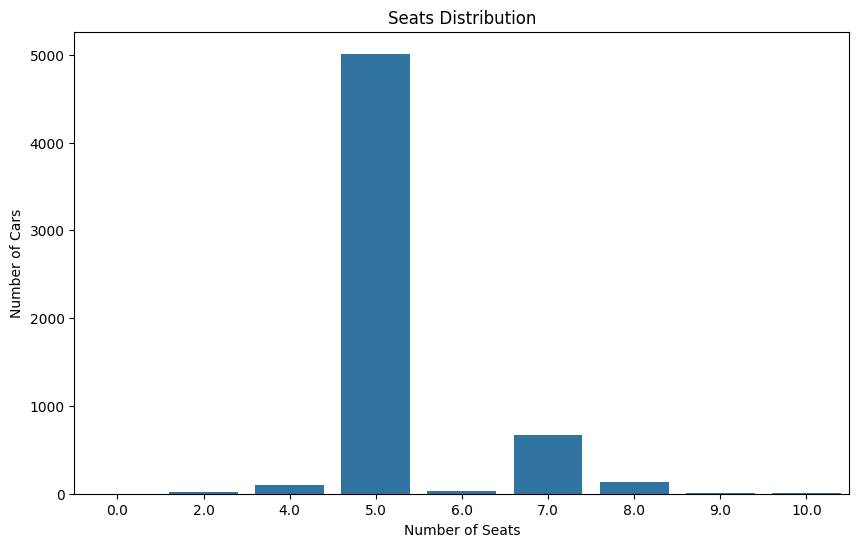

In [25]:
# 6. Seats Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Seats', data=df)
plt.title('Seats Distribution')
plt.xlabel('Number of Seats')
plt.ylabel('Number of Cars')
plt.show()

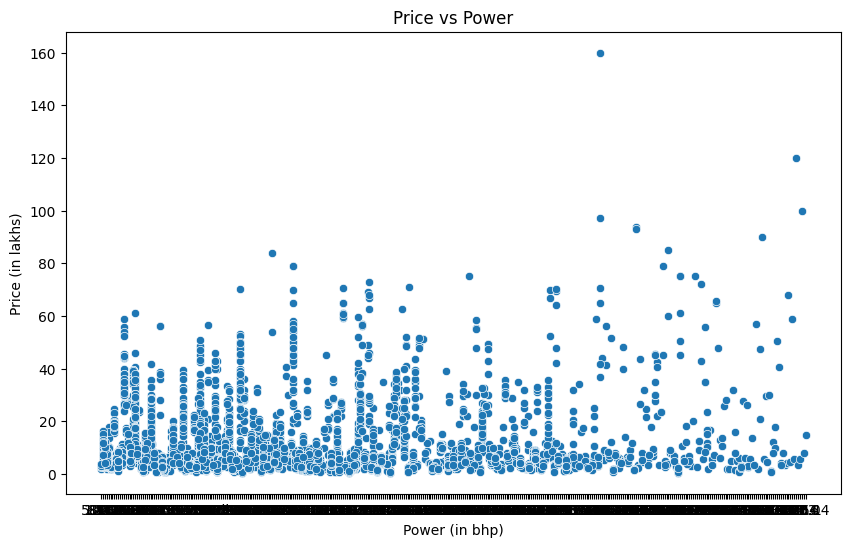

In [26]:
# 7. Price vs Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Power(bhp)'], y=df['Price'])
plt.title('Price vs Power')
plt.xlabel('Power (in bhp)')
plt.ylabel('Price (in lakhs)')
plt.show()

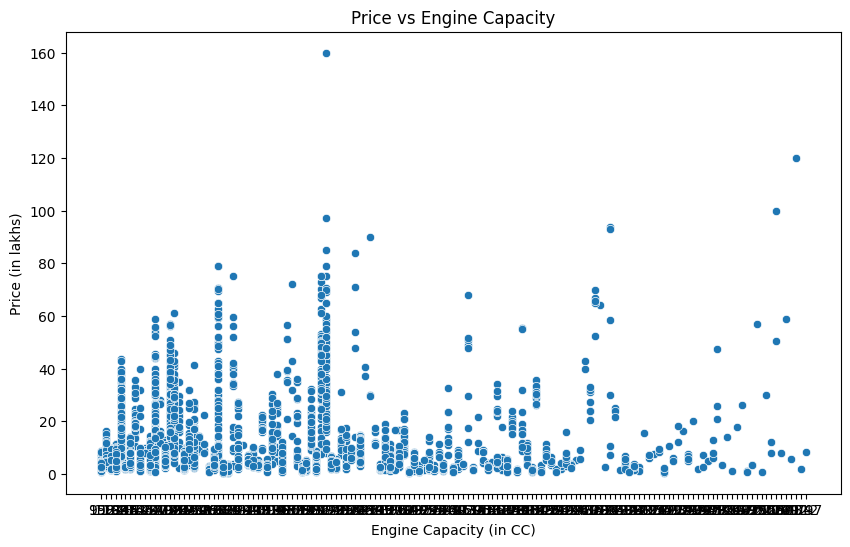

In [27]:
# 8. Price vs Engine Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Engine(CC)'], y=df['Price'])
plt.title('Price vs Engine Capacity')
plt.xlabel('Engine Capacity (in CC)')
plt.ylabel('Price (in lakhs)')
plt.show()

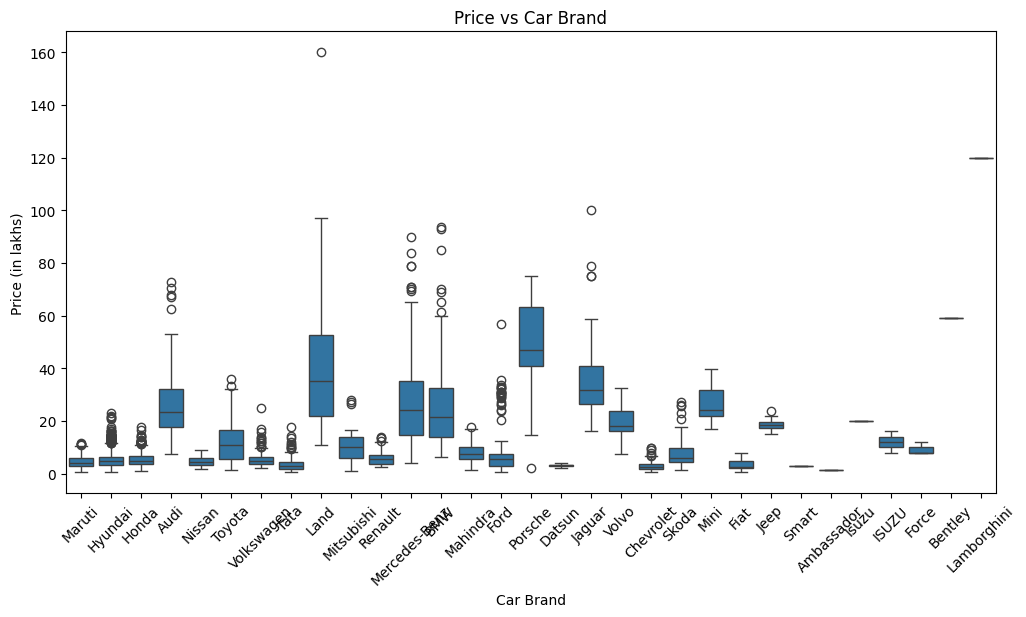

In [28]:
# 9. Price vs Car Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Name', y='Price', data=df)
plt.title('Price vs Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

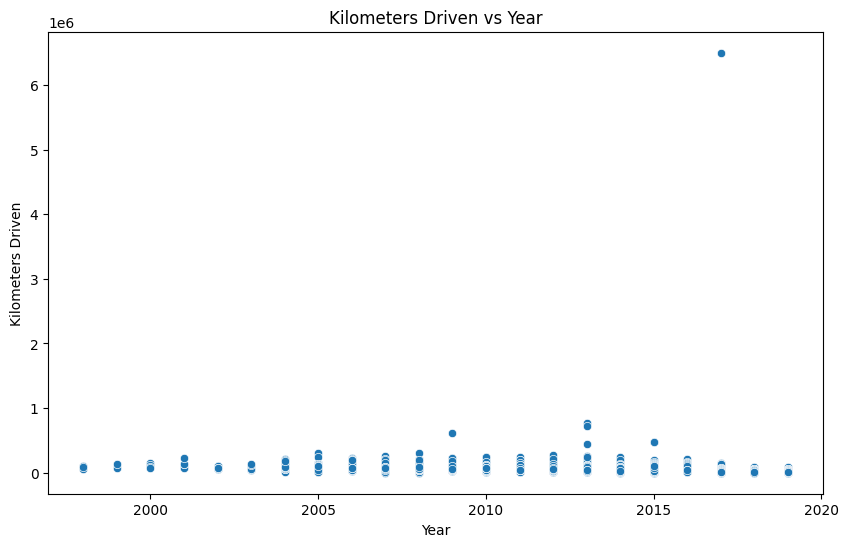

In [29]:
# 10. Kilometers Driven vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Year'], y=df['Kilometers_Driven'])
plt.title('Kilometers Driven vs Year')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.show()

<Figure size 1200x800 with 0 Axes>

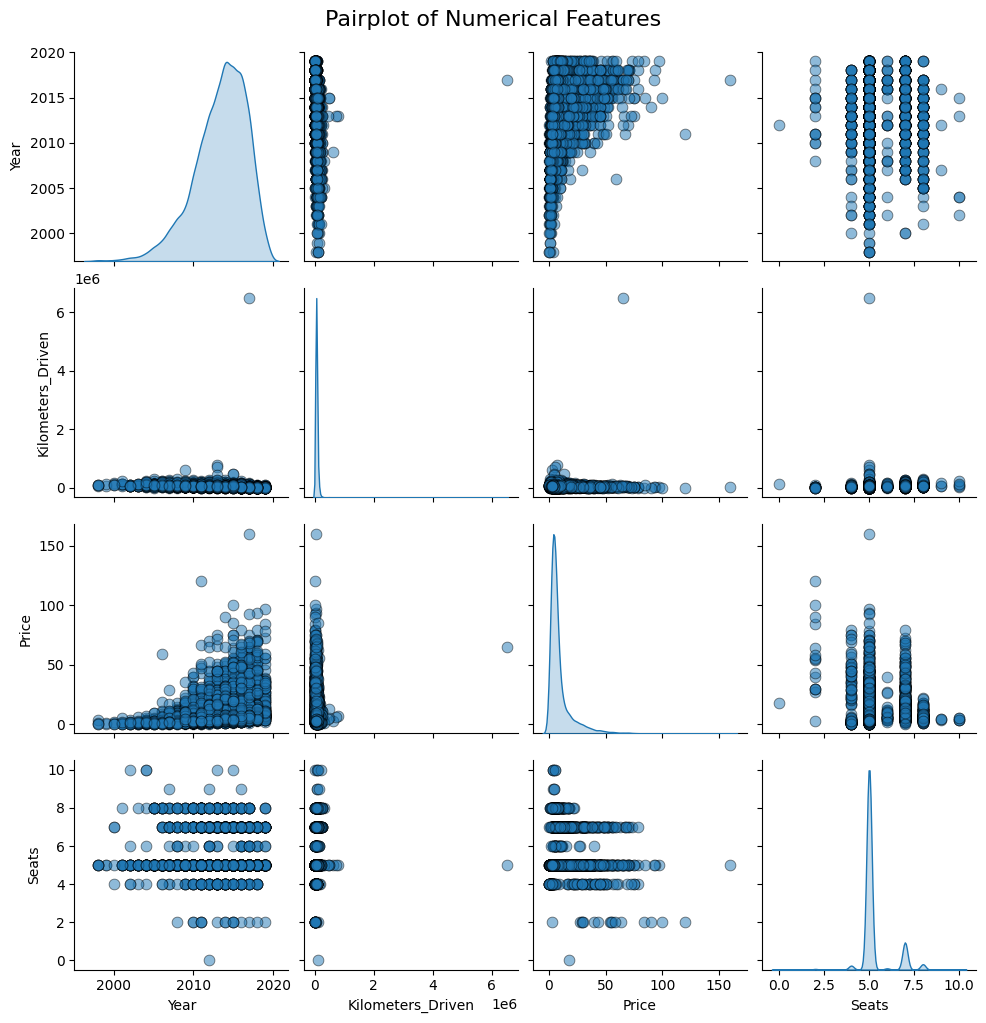

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'

# Selecting relevant numerical columns for the pairplot
numerical_columns = ['Year', 'Kilometers_Driven', 'Price', 'Seats', 'Power(bhp)', 'Engine(CC)']

# Creating the pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns], diag_kind='kde', plot_kws={'alpha':0.5, 's':60, 'edgecolor':'k'}, height=2.5)
plt.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=16)
plt.show()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Seats              5975 non-null   float64
 8   Price              5975 non-null   float64
 9   Mileage(km/kg)     5975 non-null   object 
 10  Engine(CC)         5975 non-null   object 
 11  Power(bhp)         5975 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [32]:
# List of columns you want to drop
columns_to_drop = ['First_Name', 'location']

# Drop only the columns that exist in the dataframe
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Display the dataframe to check the changes
print(df)


           Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0        Maruti      Mumbai  2010              72000       CNG       Manual   
1       Hyundai        Pune  2015              41000    Diesel       Manual   
2         Honda     Chennai  2011              46000    Petrol       Manual   
3        Maruti     Chennai  2012              87000    Diesel       Manual   
4          Audi  Coimbatore  2013              40670    Diesel    Automatic   
...         ...         ...   ...                ...       ...          ...   
6014     Maruti       Delhi  2014              27365    Diesel       Manual   
6015    Hyundai      Jaipur  2015             100000    Diesel       Manual   
6016   Mahindra      Jaipur  2012              55000    Diesel       Manual   
6017     Maruti     Kolkata  2013              46000    Petrol       Manual   
6018  Chevrolet   Hyderabad  2011              47000    Diesel       Manual   

     Owner_Type  Seats  Price Mileage(km/kg) Engine

In [33]:
df["Mileage(km/kg)"] = df["Mileage(km/kg)"].astype(float)
df["Engine(CC)"] = df["Engine(CC)"].astype(float)
df = df[pd.to_numeric(df['Power(bhp)'], errors='coerce').notnull()]
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

<ipython-input-33-c8cfbd38e522>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power(bhp)'] = df['Power(bhp)'].astype(float)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [35]:
df.dropna(inplace=True)


<ipython-input-35-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Seats              5872 non-null   float64
 8   Price              5872 non-null   float64
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB
None


In [37]:
from sklearn.preprocessing import LabelEncoder

# Assuming your dataframe is named 'df'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the dataframe to check the changes
print(df.head())

   Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0    18         9  2010              72000          0             1   
1    10        10  2015              41000          1             1   
2     9         2  2011              46000          3             1   
3    18         2  2012              87000          1             1   
4     1         3  2013              40670          1             0   

   Owner_Type  Seats  Price  Mileage(km/kg)  Engine(CC)  Power(bhp)  
0           0    5.0   1.75           26.60       998.0       58.16  
1           0    5.0  12.50           19.67      1582.0      126.20  
2           0    5.0   4.50           18.20      1199.0       88.70  
3           0    7.0   6.00           20.77      1248.0       88.76  
4           2    5.0  17.74           15.20      1968.0      140.80  


In [38]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,18,9,2010,72000,0,1,0,5.0,1.75,26.60,998.0,58.16
1,10,10,2015,41000,1,1,0,5.0,12.50,19.67,1582.0,126.20
2,9,2,2011,46000,3,1,0,5.0,4.50,18.20,1199.0,88.70
3,18,2,2012,87000,1,1,0,7.0,6.00,20.77,1248.0,88.76
4,1,3,2013,40670,1,0,2,5.0,17.74,15.20,1968.0,140.80


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# استيراد المكتبات اللازمة
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# تعريف النماذج
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=min(5, len(X_train)))  # Adjust n_neighbors
}

# تدريب وتقييم النماذج
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.2f}, R^2 = {r2:.2f}")


Linear Regression: MSE = 34.22, R^2 = 0.67
Ridge Regression: MSE = 34.22, R^2 = 0.67
Lasso Regression: MSE = 35.51, R^2 = 0.66
ElasticNet Regression: MSE = 35.37, R^2 = 0.66
Decision Tree: MSE = 22.78, R^2 = 0.78
Random Forest: MSE = 13.12, R^2 = 0.87
Gradient Boosting: MSE = 14.57, R^2 = 0.86
AdaBoost: MSE = 46.01, R^2 = 0.56
Support Vector Regression: MSE = 112.97, R^2 = -0.08
K-Nearest Neighbors: MSE = 53.63, R^2 = 0.49


In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
# Define hyperparameter grids
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {
        'alpha': [0.1, 1, 10, 100]
    },
    'Lasso Regression': {
        'alpha': [0.1, 1, 10, 100]
    },
    'ElasticNet Regression': {
        'alpha': [0.1, 1, 10, 100],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Support Vector Regression': {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.2]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }
}


In [43]:
# Train and evaluate models with hyperparameter tuning
for name, model in models.items():
    param_grid = param_grids[name]
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: Best Params = {grid_search.best_params_}, MSE = {mse:.2f}, R^2 = {r2:.2f}")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name}: MSE = {mse:.2f}, R^2 = {r2:.2f}")


Linear Regression: MSE = 34.22, R^2 = 0.67
Ridge Regression: Best Params = {'alpha': 0.1}, MSE = 34.22, R^2 = 0.67
Lasso Regression: Best Params = {'alpha': 0.1}, MSE = 34.11, R^2 = 0.67
ElasticNet Regression: Best Params = {'alpha': 0.1, 'l1_ratio': 0.1}, MSE = 34.20, R^2 = 0.67
Decision Tree: Best Params = {'max_depth': 30, 'min_samples_split': 10}, MSE = 17.97, R^2 = 0.83
Random Forest: Best Params = {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}, MSE = 12.92, R^2 = 0.88
Gradient Boosting: Best Params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}, MSE = 9.89, R^2 = 0.91
AdaBoost: Best Params = {'learning_rate': 0.1, 'n_estimators': 200}, MSE = 29.93, R^2 = 0.71
Support Vector Regression: Best Params = {'C': 100, 'epsilon': 0.2}, MSE = 67.84, R^2 = 0.35
K-Nearest Neighbors: Best Params = {'n_neighbors': 7, 'weights': 'distance'}, MSE = 54.03, R^2 = 0.48


In [44]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN model with default n_neighbors or adjust as needed
knn_model = KNeighborsRegressor(n_neighbors=min(5, len(X_train)))

# Train and evaluate KNN model
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors: MSE = {mse_knn:.2f}, R^2 = {r2_knn:.2f}")


K-Nearest Neighbors: MSE = 53.63, R^2 = 0.49
